# 5 Семинар Непараметрические критерии

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import hashlib
import collections

plt.style.use('ggplot')
%matplotlib inline

Будем исследовать данные про счастье :)

In [ ]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/2015.csv >> 2015.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16557  100 16557    0     0  61986      0 --:--:-- --:--:-- --:--:-- 62244


In [ ]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/2019.csv >> 2019.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8665  100  8665    0     0  28268      0 --:--:-- --:--:-- --:--:-- 28316


In [ ]:
df_2015 = pd.read_csv("2015.csv")
df_2019 = pd.read_csv("2019.csv")
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


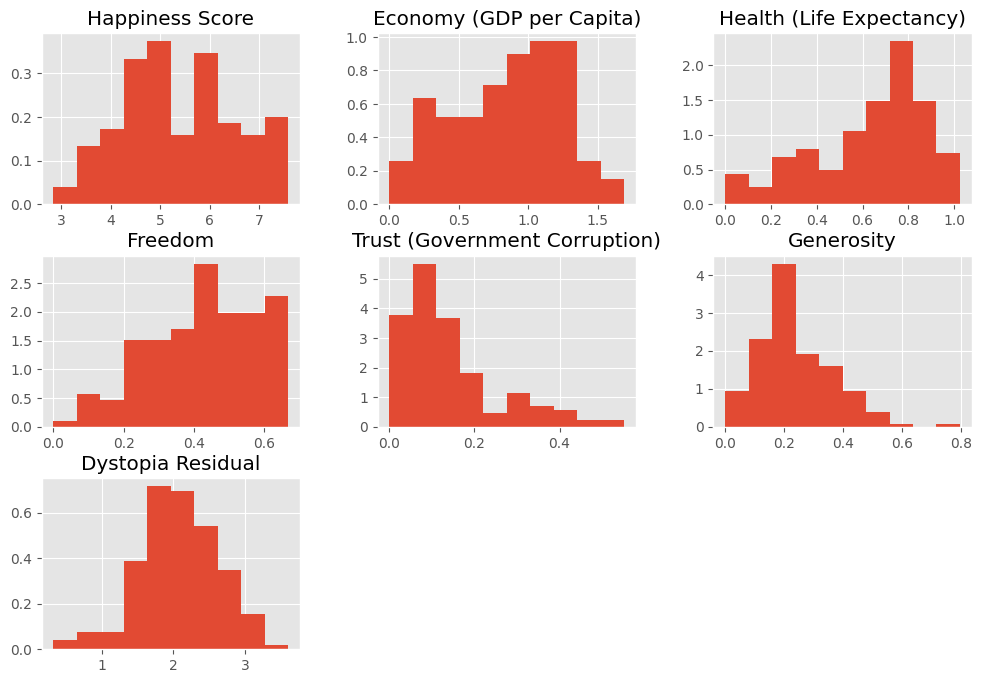

In [ ]:
df_2015[['Happiness Score', 'Economy (GDP per Capita)',
         'Health (Life Expectancy)', 'Freedom',
         'Trust (Government Corruption)','Generosity',
         'Dystopia Residual']].hist(density=True, figsize=(12,8));

<ipython-input-111-a950ad75fde8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2015['Trust (Government Corruption)']);


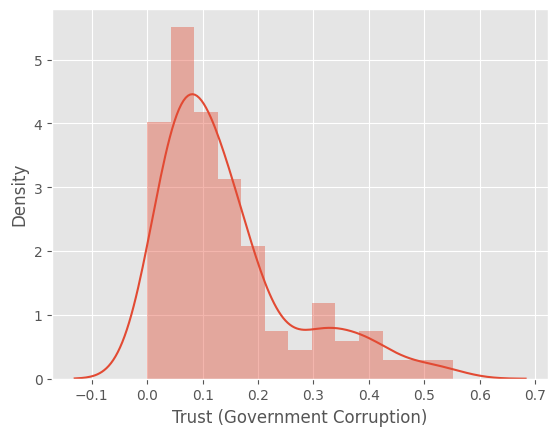

In [ ]:
sns.distplot(df_2015['Trust (Government Corruption)']);

<ipython-input-112-6a2b41e5d380>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2015['Happiness Score']);


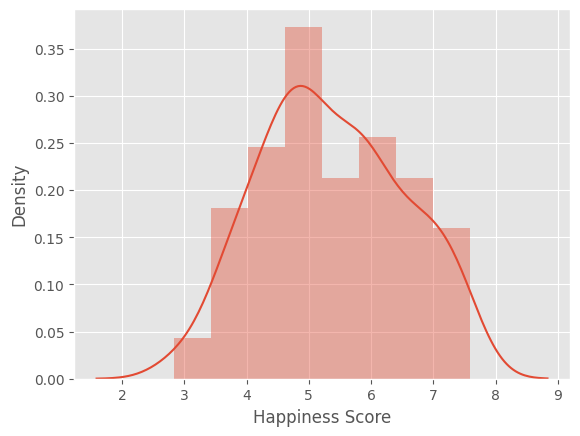

In [ ]:
sns.distplot(df_2015['Happiness Score']);

# 1. Одновыборочные критерии




Проверим гипотезу о том, что медиана уровня счастья равна $5$.

$H_0\colon Med(X) = 5$

$H_1\colon Med(X) \ne 5$

In [ ]:
df_2015['Happiness Score'].describe()

,Happiness Score
count,158.000000
mean,5.375734
std,1.145010
min,2.839000
25%,4.526000
50%,5.232500
75%,6.243750
max,7.587000


__Воспользуемся критерием знаков.__

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

x = df_2015['Happiness Score'].values
T, pvalue = sign_test(x, mu0=5)
T, pvalue

(1.0, 0.9366240696485006)

Гипотеза $H_0$ отвергается на 5% уровне значимости

__Воспользуемся критерием Уилкоксона.__

In [ ]:
_, pvalue = stats.wilcoxon(x - 5)
pvalue

0.09875216646249735

Гипотеза $H_0$ отвергается на 5% уровне значимости

# 2. Двухвыборочные (несвязанные выборки)



Правда ли, что в Европе уровень счастья выше, чем в Азии?

In [ ]:
df_2015.Region.value_counts()

,count
Region,
Sub-Saharan Africa,40
Central and Eastern Europe,29
Latin America and Caribbean,22
Western Europe,21
Middle East and Northern Africa,20
Southeastern Asia,9
Southern Asia,7
Eastern Asia,6
North America,2


In [ ]:
usl = df_2015.Region.apply(lambda w: 'Asia' in w)
x_asia = df_2015[usl]['Happiness Score']
x_asia.size

22

In [ ]:
usl = df_2015.Region.apply(lambda w: 'Europe' in w)
x_eur = df_2015[usl]['Happiness Score']
x_eur.size

50

__Ранговый критерий Манна-Уитни__

$H_0\colon f_{X}(x) = f_{Y}(x)$

$H_1\colon f_{X}(x) = f_{Y}(x + \Delta), \Delta > 0$

In [ ]:
stats.mannwhitneyu(x_eur, x_asia, alternative='greater')

MannwhitneyuResult(statistic=774.0, pvalue=0.0031457735731103722)

Гипотеза $H_0$ отвергается. По этим данным, в Европе люди счастливее.

<ipython-input-122-801688286a6d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_eur, bins=10);


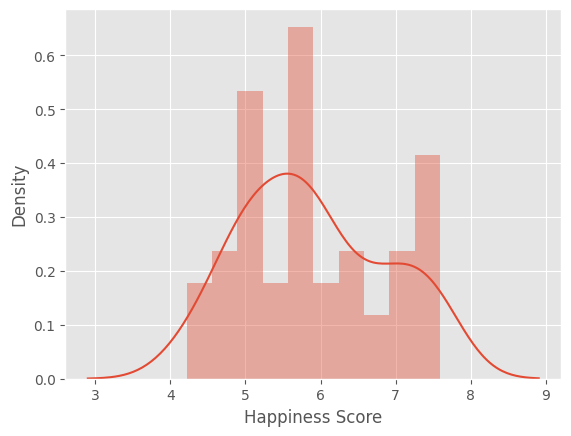

In [ ]:
sns.distplot(x_eur, bins=10);

<ipython-input-123-81dde9690b29>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_asia, bins=10);


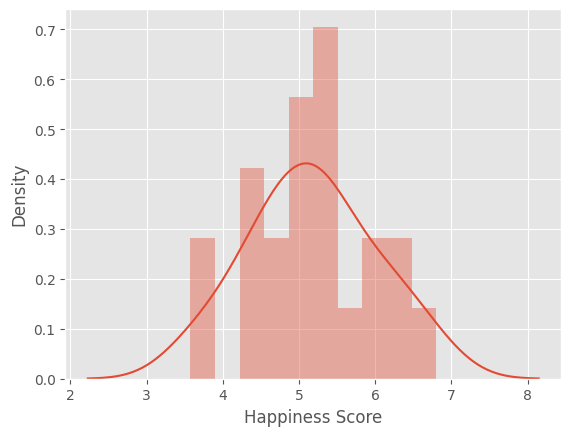

In [ ]:
sns.distplot(x_asia, bins=10);

Плотности визуально различаются. Возможно, что мы использовали тест некорректно. Не помешает дополнительно проверить гипотезу о том, что обе выборки относятся к одному распределению:

In [ ]:
stats.ks_2samp(x_eur, x_asia)

KstestResult(statistic=0.36727272727272725, pvalue=0.023484023767084545, statistic_location=5.474, statistic_sign=-1)

Гипотеза об одинаковом распределении отвергается для 5% уровня значимости, но не отвергается для 1%. Правильно было бы до проведения теста зафиксировать уровень значимости и после опираться уже на него, а не подбирать уровень значимости после проведения теста.

 Другой путь: ориентироваться на здравый смысл, а он нам подсказывает, что, скорее всего, счастье не могло поменять свой закон распределения за пять лет. Хотя никто не гарантирует, у этих регионов нет каких то фундаментальных отличий, которые заставляют показатель счастья иметь разное распределение

# 3. Двухвыборочные (связные выборки)




Правда ли, что к 2019 году уровень счастья в мире вырос?

In [ ]:
df_2015 = df_2015[['Country','Happiness Score']]
df_2015.columns = ['Country', 'Happiness_2015']
df_2015.set_index('Country', inplace=True)

df_2019 = df_2019[['Country or region','Score']]
df_2019.columns = ['Country', 'Happiness_2019']
df_2019.set_index('Country', inplace=True)

df = df_2019.join(df_2015).dropna()
df.head()

,Happiness_2019,Happiness_2015
Country,,
Finland,7.769,7.406
Denmark,7.600,7.527
Norway,7.554,7.522
Iceland,7.494,7.561
Netherlands,7.488,7.378


In [ ]:
df.describe()

,Happiness_2019,Happiness_2015
count,149.000000,149.000000
mean,5.433872,5.378289
std,1.111243,1.157782
min,3.083000,2.839000
25%,4.548000,4.518000
50%,5.425000,5.253000
75%,6.198000,6.295000
max,7.769000,7.587000


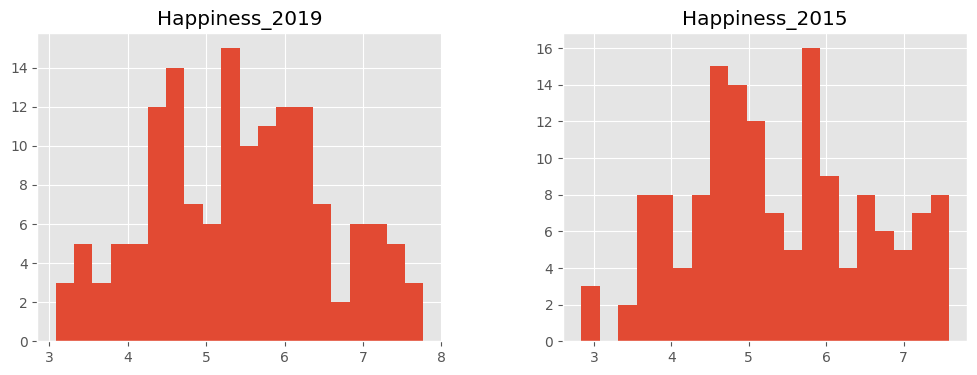

In [ ]:
df.hist(figsize=(12,4), bins=20);

__Критерий знаков__

$H_0\colon P(X > Y) = 0.5$

$H_1\colon P(X > Y) \ne 0.5$

In [ ]:
_, pvalue = sign_test(df.Happiness_2019 - df.Happiness_2015)
pvalue

0.7432690217670562

Гипотеза $H_0$ о том, что уровень счастья не изменился, не отвергается.

__Ранговый тест Уилкоксона__

$H_0\colon Med(X - Y) = 0$

$H_1\colon Med(X - Y) \ne 0$

In [ ]:
stats.wilcoxon(df.Happiness_2019, df.Happiness_2015)

WilcoxonResult(statistic=4948.0, pvalue=0.22554445938820344)

Гипотеза $H_0$ о том, что уровень счастья не изменился, не отвергается.

# 4. Бустреп

<center>
<img src="https://raw.githubusercontent.com/YuriyKotov/datasets/master/bootstrap.png" height="700" width="1500">
</center>

## Деньги моего отца



Мой отец завёл себе копилку и собирает десятирублёвые монеты. Мне стало интересно как именно распределён возраст этих монет.

Я сделал из копилки случайную выборку из сотни десятирублёвых монет и записал дату с каждой в файл `money.csv`.

In [ ]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/money.csv >> money.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   510  100   510    0     0   1813      0 --:--:-- --:--:-- --:--:--  1814


In [ ]:
money = pd.read_csv('money.csv').fielddate.values
money

array([2011, 2017, 2016, 2012, 2017, 2015, 2011, 2015, 2017, 2012, 2019,
       2019, 2012, 2018, 2018, 2018, 2018, 2017, 2018, 2012, 2010, 2012,
       2012, 2011, 2011, 2012, 2011, 2017, 2017, 2016, 2012, 2012, 2017,
       2017, 2012, 2010, 2018, 2016, 2011, 2017, 2012, 2017, 2013, 2017,
       2010, 2011, 2018, 2015, 2011, 2018, 2012, 2013, 2009, 2017, 2017,
       2018, 2019, 2018, 2011, 2013, 2011, 2013, 2017, 2018, 2011, 2012,
       2018, 2012, 2019, 2018, 2011, 2017, 2019, 2019, 2019, 2012, 2011,
       2013, 2011, 2017, 2013, 2013, 2017, 2017, 2017, 2011, 2019, 2013,
       2017, 2012, 2009, 2010, 2010, 2020, 2019, 2020, 2020, 2019, 2018,
       2020])

In [ ]:
money.size

100

In [ ]:
money_age = 2020 - money # перешли к возрасту
money_age.size

100

In [ ]:
money_age

array([ 9,  3,  4,  8,  3,  5,  9,  5,  3,  8,  1,  1,  8,  2,  2,  2,  2,
        3,  2,  8, 10,  8,  8,  9,  9,  8,  9,  3,  3,  4,  8,  8,  3,  3,
        8, 10,  2,  4,  9,  3,  8,  3,  7,  3, 10,  9,  2,  5,  9,  2,  8,
        7, 11,  3,  3,  2,  1,  2,  9,  7,  9,  7,  3,  2,  9,  8,  2,  8,
        1,  2,  9,  3,  1,  1,  1,  8,  9,  7,  9,  3,  7,  7,  3,  3,  3,
        9,  1,  7,  3,  8, 11, 10, 10,  0,  1,  0,  0,  1,  2,  0])

Посмотрим как распределён возраст.

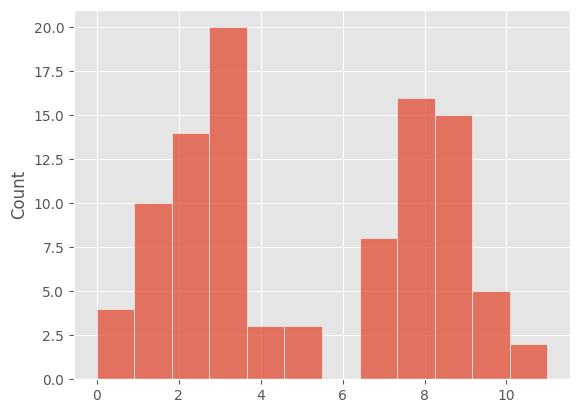

In [ ]:
sns.histplot(data=money_age, bins=12);

Распределение оказывается нестандартным. Видно, что у него есть две моды. Посмотрим на средний возраст монет.

In [ ]:
money_age.mean()

5.16

In [ ]:
np.median(money_age)

4.0

Интересно было бы построить для этого среднего доверительный интервал. Сделаем это с помощью бустрапа.

In [ ]:
def get_bootstrap_sample(x, B_sample=1):
    N = x.size
    sample = np.random.choice(x, size=(N, B_sample), replace=True)

    if B_sample == 1:
        sample = sample.T[0]
    return sample

money_age_boot = get_bootstrap_sample(money_age)
money_age_boot

array([ 8,  3,  8,  1,  2,  2,  9,  3,  2, 10,  2,  3,  3, 11,  4,  3,  0,
        2,  8,  8,  2,  1,  1,  2,  9, 10,  9,  8,  1, 11,  2,  8,  9,  7,
        0,  9,  9,  7,  2,  8,  9,  8,  0,  3,  4,  9,  8,  1,  7,  1,  1,
        1, 10,  1,  2,  1,  3, 10,  7,  9,  9,  7,  9,  3,  8,  7,  2,  3,
        1,  9,  3,  3,  8,  3,  2,  9,  3,  3,  2,  5,  7,  2,  4,  4, 11,
        0,  3,  1,  0,  9,  0,  2,  1,  1, 11,  3,  8,  1,  1,  8])

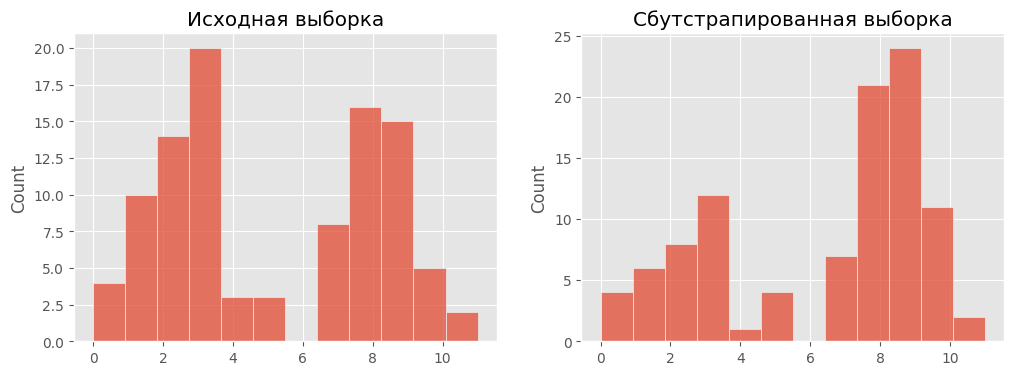

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(money_age, ax=axes[0], bins=12)
sns.histplot(money_age_boot, ax=axes[1], bins=12)
axes[0].set_title("Исходная выборка")
axes[1].set_title("Сбутстрапированная выборка");

Сгенерируем выборку из средних.

In [ ]:
money_age_boot = get_bootstrap_sample(money_age, B_sample=1000000)
money_age_boot.shape

(100, 1000000)

In [ ]:
money_age_boot

array([[ 8,  2,  8, ..., 10,  7,  9],
       [ 9,  2,  3, ...,  9,  9,  9],
       [ 9,  5,  7, ...,  3,  9,  2],
       ...,
       [11,  1, 11, ...,  4,  3,  4],
       [ 0,  8,  5, ..., 10,  1,  4],
       [ 9,  2,  3, ...,  8,  7,  0]])

In [ ]:
money_age_boot_m = np.mean(money_age_boot, axis=0)
money_age_boot_m

array([5.22, 5.57, 4.59, ..., 5.53, 5.  , 4.77])

In [ ]:
money_age_boot_m.size

100

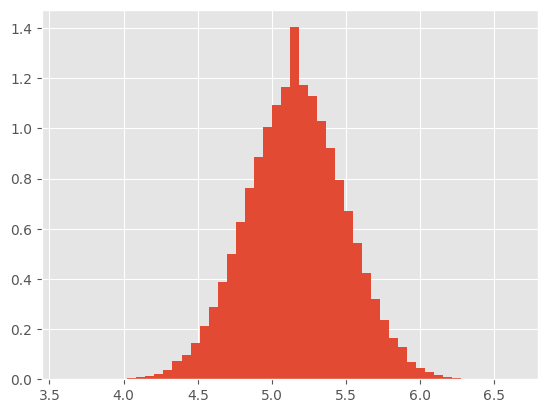

In [ ]:
plt.hist(money_age_boot_m, bins=50, density=True);

Сравним получившееся распределение с нормальным. Они оказываются похожи. Это связано с тем, что мы бустрапируем среднее, в возрасте монет нет выбросов, поэтому тут хорошо работает ЦПТ.

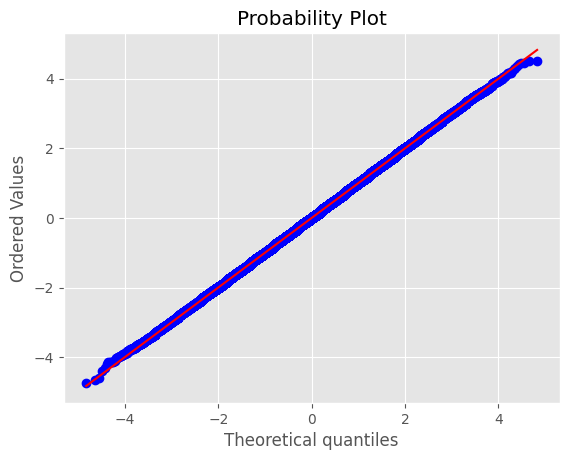

In [ ]:
money_scale = (money_age_boot_m - money_age_boot_m.mean())/money_age_boot_m.std()
stats.probplot(money_scale, dist="norm", plot=plt);

Построим доверительный интервал для среднего. __Делай раз:__ доверительный интервал Эфрона.

In [ ]:
alpha = 0.05

left = np.quantile(money_age_boot_m, alpha/2)
right = np.quantile(money_age_boot_m, 1-alpha/2)
left, right

(4.52, 5.8)

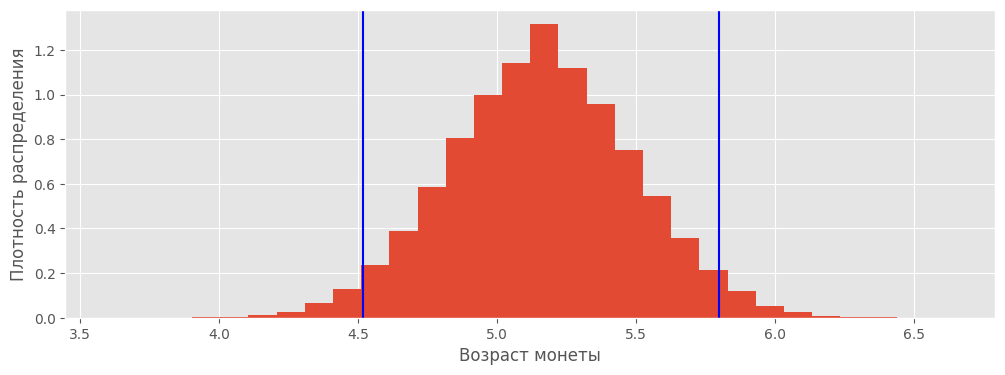

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.hist(money_age_boot_m, bins=30, density=True)
plt.axvline(left, color='b')
plt.axvline(right, color='b');

plt.xlabel('Возраст монеты')
plt.ylabel('Плотность распределения');

__Делай два:__ доверительный интервал Холла. Он строится для центрированного распределения

In [ ]:
alpha = 0.05

theta_hat = np.mean(money_age)
money_age_boot_h = np.mean(money_age_boot - theta_hat, axis=0)

left = theta_hat - np.quantile(money_age_boot_h, 1-alpha/2)
right = theta_hat - np.quantile(money_age_boot_h, alpha/2)
left, right

(4.519999999999998, 5.799999999999999)

__Делай три:__ t-процентильный доверительный интервал

In [ ]:
theta_hat = np.mean(money_age)
std_hat = np.std(money_age)

money_age_boot_t = np.mean(money_age_boot - theta_hat, axis=0)
money_age_boot_t = money_age_boot_t/np.std(money_age_boot, axis=0)

left = theta_hat - np.quantile(money_age_boot_t, 1-alpha/2)*std_hat
right = theta_hat - np.quantile(money_age_boot_t, alpha/2)*std_hat
left, right

(4.508296433028519, 5.820667707412549)

Последний доверительный интервал получился пошире. [Теория показывает,](http://quantile.ru/03/03-SA.pdf) что последний способ даёт более низкую ошибку в плане асимптотики.

Для нашего примера разные доверительные интервалы практически не отличаются, из-за того что скошеность у распределения не особо сильная и нет явных выбросов

##  Цитаты и репосты



> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её не грех репостнуть на стеночку. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она получит лайк повышается. Например, цитату

> Можно простить человеку все, кроме отсутствия. (Экзюпери)

мне не очень хотелось бы лайкать. А вот цитата

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков)

совершенно другое дело.

В табличке `df_vk_wise` лежат даныне о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено и будем работать с остатками.

In [ ]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/df_vk_wise.csv >> df_vk_wise.csv

In [ ]:
df = pd.read_csv('df_vk_wise.csv')
df.head()

,likes,reposts,text,I
0,7,0,Кому удобнее следить за новостями М. в инстагр...,False
1,575,25,"Если девушка невероятно хороша в юности, но ра...",False
2,509,57,"То была очень обычная узость мышления - те, кт...",False
3,542,15,"Когда он знакомил меня с Сергеем, тот спросил:...",False
4,949,59,"- Общепризнано, сэр, что физические упражнения...",False


Построим гистограмму для числа репостов постов, содержащих личные местоимения и не содержащих.

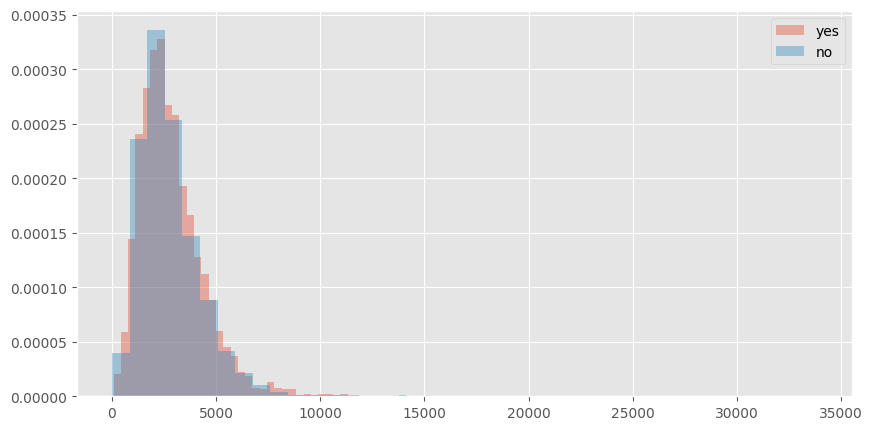

In [ ]:
x = df[df['I']== True]['likes'].values
y = df[df['I']== False]['likes'].values

plt.figure(figsize=(10,5))
plt.hist(x, bins=40, density=True, alpha=0.4, label='yes')
plt.hist(y, bins=40, density=True, alpha=0.4, label='no')
plt.legend();

In [ ]:
np.median(x), np.median(y)

(2580.5, 2490.0)

Хвосты на гистограммах оказываются очень длинными. У нас есть выбросы. Смотреть на средние, чтобы сравнить между собой разные цитаты, будет некорректно. Будем смотреть на медианы. Построим доверительный интервал для разности медиан.

In [ ]:
x_boot = get_bootstrap_sample(x, B_sample=10**4)
x_boot = np.median(x_boot, axis=0)

y_boot = get_bootstrap_sample(y, B_sample=10**4)
y_boot = np.median(y_boot, axis=0)

In [ ]:
def stat_intervals(boot, alpha=0.05):
    left = np.quantile(boot, alpha/2)
    right = np.quantile(boot, 1-alpha/2)
    return left, right

In [ ]:
stat_intervals(x_boot)

(2516.0, 2656.0)

In [ ]:
stat_intervals(y_boot)

(2456.975, 2527.0)

Доверительные интервалы пересекаются. Но делать вывод лучше по доверительному интервалу для разности. Такая процедура будет мощнее.

<ipython-input-187-dcab81c1e048>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_boot - y_boot);


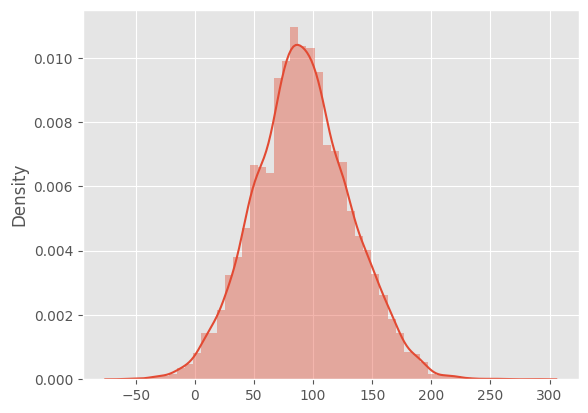

In [ ]:
sns.distplot(x_boot - y_boot);

In [ ]:
stat_intervals(x_boot - y_boot)

(13.0, 172.0)

Ноль не попадает в доверительный интервал, значит на уровне значимость $5\%$ разница есть. На последок посмотрим на вероятность того, что разность больше нуля.

In [ ]:
np.mean(x_boot - y_boot > 0)

### Доп материалы:

* [Статья про бустрэп от Станислава Анатольева](http://quantile.ru/03/03-SA.pdf)
* [Неплохая статья про бутстрап в R, на основе которой делалась тетрадка](https://moderndive.com/8-confidence-intervals.html)

<center>
<img src="https://raw.githubusercontent.com/YuriyKotov/datasets/master/real_expect.png" height="300" width="700">
</center>

# 5. Проверка нормальности



**Критерий Колмогорова**

__Гипотеза о неизвестном законе распределения:__

$$
\begin{aligned}
H_0 : X \sim F_0 \\
H_1 : X \nsim F_0
\end{aligned}
$$

__Статистика:__

$$
K_n = \sqrt{n} \cdot \sup_{x} \mid \hat F_n(x) - F(x) \mid
$$

При справедливости нулевой гипотезы распределение статистики $K_n$ одинаково для любого исходного непрерывного распределения.

### Упражнение 1 (искусство требует генераций)

Попробуем провести тест Колмогорова на нескольких искуственных примерах.

In [ ]:
x = stats.norm(loc=5, scale=3).rvs(1000)
stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))

KstestResult(statistic=0.030097452605470698, pvalue=0.31895827493343176, statistic_location=6.778211112621763, statistic_sign=-1)

Гипотеза о нормальности для выборки, сгенерированной из нормального распределения не отвергается. Проверим теперь критерием Шапиро-Уилка

### Критерий Шапиро-Уилка

$$
\begin{aligned}
H_0 : X \sim N(\mu, \sigma^2) \\
H_1 : X \nsim N(\mu, \sigma^2)
\end{aligned}
$$



In [ ]:
stats.shapiro(x)

ShapiroResult(statistic=0.9976835318268383, pvalue=0.17391274902534437)

Критерий Шапиро-Уилка тоже подтвердил что у нас выборка из нормального распределения. Сгенерируем выборку из равномерного распределения, а после протестируем гипотезу о нормальности.  

In [ ]:
x = stats.uniform(0,1).rvs(1000)
stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))

KstestResult(statistic=0.07257063708421602, pvalue=5.025916227478839e-05, statistic_location=0.29086049594499563, statistic_sign=1)

Видим, что $p\_value$ очень низкое. Гипотеза о нормальности отвергается. Проверим что покажет тест Шапиро-Уилка

In [ ]:
stats.shapiro(x)

ShapiroResult(statistic=0.9561362423817683, pvalue=1.0000822285615939e-16)

Гипотеза тоже отвергается, у нас выборка не из нормального распределения.

Критерием Колмогорова можно так же проверять принадлежность выборки любому распределению, вот пример для экспоненциального


In [ ]:
x = stats.expon(scale=0.2).rvs(1000)
stats.kstest(x, 'expon', args=(0, x.mean()))

KstestResult(statistic=0.01714614874152809, pvalue=0.9254422615056581, statistic_location=0.2373518338388205, statistic_sign=-1)

Первый аргумент отвечает за `loc` (экспоненциальное распределение со сдвигом). Он равен нулю.

### Упражнение 2 (акции)

Подгрузим данные о стоимости акций Яндекса в течение последних $10$ лет.

In [ ]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/ynd.tsv >> ynd.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  155k  100  155k    0     0   511k      0 --:--:-- --:--:-- --:--:--  512k


In [ ]:
df = pd.read_csv('ynd.tsv', sep='\t')
df['fielddate'] = pd.to_datetime(df['fielddate'])
df.set_index('fielddate', inplace=True)
print(df.shape)
df.head()

(2291, 6)


,open,high,low,close,volume,adjusted
fielddate,,,,,,
2011-05-24,35.000000,42.009998,30.549999,38.840000,70186700.0,38.840000
2011-05-25,37.750000,37.900002,34.400002,35.000000,11761600.0,35.000000
2011-05-26,34.450001,35.450001,34.000000,34.770000,4417500.0,34.770000
2011-05-27,34.750000,35.000000,34.000000,34.450001,2006000.0,34.450001
2011-05-31,34.950001,35.369999,32.610001,33.450001,3981100.0,33.450001


Обычно финансисты работают с доходностями:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

In [ ]:
r = (df.close.diff()/df.close.shift(1)).dropna()
r

,close
fielddate,
2011-05-25,-0.098867
2011-05-26,-0.006571
2011-05-27,-0.009203
2011-05-31,-0.029028
2011-06-01,-0.035874
...,...
2020-06-24,0.026531
2020-06-25,0.004970
2020-06-26,-0.030069


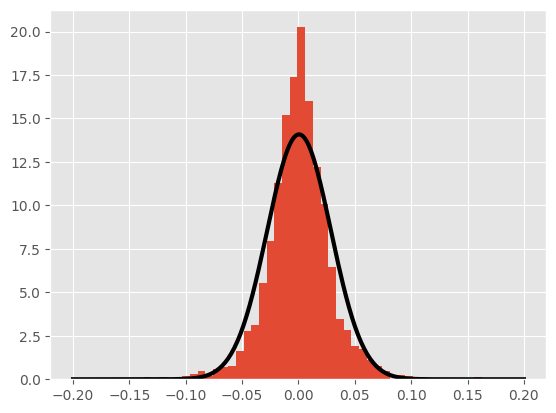

In [ ]:
r.hist(bins=50, density=True);

xs = np.linspace(-0.2, 0.2, 300)
ys = stats.norm(loc=r.mean(), scale=r.std(ddof=1)).pdf(xs)
plt.plot(xs, ys, color="black", lw=3);

 Как это не странно, оно оказывается куполообразным. Издали распределение напоминает собой нормальное. Однако это ещё не факт. Можно заметить, что у распределения довольно тяжёлые хвосты. Чтобы увидеть это построим диаграмму квантиль-квантиль. Она позволяет сравнить выборочное распределение с теоретическим.

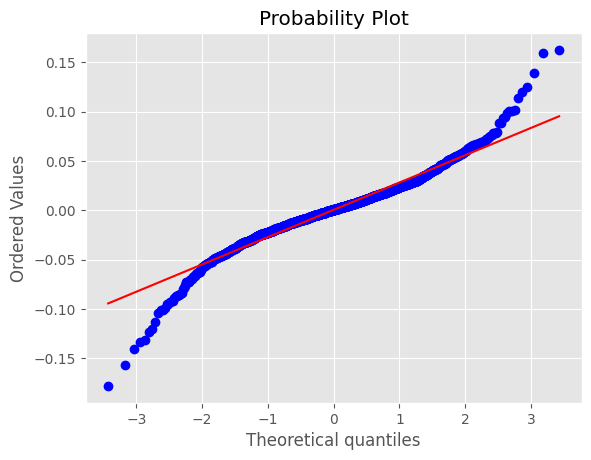

In [ ]:
stats.probplot(r, dist="norm", plot=plt);

На диаграмме по оси $x$ откладываются значения из теоретического нормального распределения. По оси $y$ откладывают значения, которые фигурируют в выборке. Если бы наши наблюдения были из нормального распределения, они бы оказались на диагонали. Центр, действительно, укладывается на неё. А вот хвосты с неё спадают. Они оказываются тяжелыми.

Проверим гипотезу тестом Колмогорова.

In [ ]:
r.mean(), r.std(ddof=1)

(0.0005134013394187065, 0.02832192239992792)

In [ ]:
stats.kstest(r, 'norm', args=(r.mean(), r.std(ddof=1)))

KstestResult(statistic=0.05845783509742103, pvalue=3.035955008495937e-07, statistic_location=-0.019044615018564158, statistic_sign=-1)

In [ ]:
stats.shapiro(r)

ShapiroResult(statistic=0.9542800420345751, pvalue=3.4195981612704686e-26)

Гипотеза о нормальности отвергается, p_value оказалось очень маленьким. Обычно доходности моделируют с помощью распределений с тяжёлыми хвостами. Попробуем проверить ту же самую гипотезу, но с помощью критерия, специфицированного под хвосты [(Андерсона-Дарлинга)](https://www.6sigma.us/six-sigma-in-focus/anderson-darling-normality-test): мы переносим на хвосты распределения дополнительный вес, чтобы критерий был к ним более чувствительным.

In [ ]:
from statsmodels.stats.diagnostic import normal_ad
pval = normal_ad(r)
pval # гипотеза о нормальности отвергается

(19.749165127467222, 0.0)

Попробуем этот же тест для выборки из нормального распределения.

In [ ]:
x = stats.norm(loc=5, scale=3).rvs(1000)
normal_ad(x)  # гипотеза о нормальности не отвергается

(0.23351498750275823, 0.7961290833927633)

### Упражнение 3 (однородность)

__Ещё одно полезное свойство критерия:__ можно проверять гипотезу об однородности выборок, то есть пытаться понять из одного ли распределения они к нам пришли. Колмогоров доказал, что для этого случая распределение Колмогорова тоже подходит.

In [ ]:
x = stats.norm(loc=5, scale=3).rvs(1000)
y = stats.norm(loc=5, scale=3).rvs(1000)
z = stats.expon(scale=0.2).rvs(1000)

In [ ]:
stats.ks_2samp(x, y)

KstestResult(statistic=0.039, pvalue=0.43260886958153144, statistic_location=7.375463181416105, statistic_sign=-1)

In [ ]:
stats.ks_2samp(y, z)

KstestResult(statistic=0.899, pvalue=0.0, statistic_location=0.908650117628135, statistic_sign=-1)

## Критерий Пирсона


__Гипотеза о неизвестном законе распределения для дискретных распределений:__


$$
\begin{aligned}
H_0 : X \sim F_0 \\
H_1 : X \nsim F_0
\end{aligned}
$$

__Статистика:__

$$
\sum_{j=1}^s \frac{(v_j - n \cdot p_j(\hat \theta))^2}{n \cdot p_j(\hat \theta)} \sim \chi^2_{s - k - 1},
$$

где $\hat \theta$ - любая состоятельная оценка параметра, $v_j$ - частота, с которой значение $j$ встречалось в выборке, $p_j$ - теоретическая вероятность того, что выпадет значение $j$,  $s$ - число значений, которые может принимать случайная величина, $k$ - размерность вектора параметров $\theta$,

### Упражнение 4 (число пи)

В десятичной записи числа $\pi$ среди первых $10000$ знаков после запятой цифры $0, 1, \dots, 9$ встречаются соответственно 968, 1026, 1021, 974, 1014, 1046, 1021, 970, 948, 1014 раз. Можно ли при уровне значимости $0.05$ считать эти цифры случайными? При каком уровне значимости эта гипотеза отвергается?




У нас есть дискретное распределение и $10$ вероятностей. Нужно проверить гипотезу о равномерности этого распределения. Будем делать это с помощью критерия Пирсона.

In [ ]:
n = 10000
X = np.array([968, 1026, 1021, 974, 1014, 1046, 1021, 970, 948, 1014])
p = X/n
p

array([0.0968, 0.1026, 0.1021, 0.0974, 0.1014, 0.1046, 0.1021, 0.097 ,
       0.0948, 0.1014])

In [ ]:
p0 = np.array([1/10]*10)
p0

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Статистика для теста Пирсона выглядит как

$$
\sum_{j=1}^{10} \frac{(v_j - n \cdot p_j(\hat \theta))^2}{n \cdot p_j(\hat \theta)} \sim \chi^2_{9},
$$

Сравниваются частоты эмпирические, с частотами теоретическими и нормируются

In [ ]:
T = np.sum((X - n*p0)**2/(n*p0))
T

9.370000000000001

Статистика Пирсона имеет $\chi^2_9$. Найдём для неё критическое значения на уровне значимости $5\%$.

In [ ]:
stats.chi2.ppf(0.95, df = 9)

16.918977604620448

Наблюдаемое значение меньше критического. Гипотеза о равномерности не отвергается. Найдём $p\_value$.

In [ ]:
1 - stats.chi2.cdf(T, df = 9)

0.40384434184393214

Видим, что $p\_value$ на порядок выше $5\%$, значит гипотеза не отвергается.

> По аналогии с тестом Колмогорова, тест Пирсона можно использовать, чтобы проверять выборки на однородность. В таком случае критерий хочет получить на вход таблицу сопряжённости для двух распределений.

### Упражнение 5 (снова однородность)

Мужчин и женщин опрашивают о их политических взглядах. Правда ли, что их распределение значимо различается.

In [ ]:
df = pd.DataFrame([[762, 327, 468],[484, 239, 477]])
df.columns = ["Democrat","Independent", "Republican"]
df.index = ["F", "M"]
df

,Democrat,Independent,Republican
F,762,327,468
M,484,239,477


In [ ]:
from scipy.stats import chi2_contingency
chi, pvalue, k, _ = chi2_contingency(df.values)

In [ ]:
chi

30.070149095754672

In [ ]:
pvalue

2.9535891832117595e-07

In [ ]:
k

2

Гипотеза об однородности выборок отвергается.

# 6. Мощность и корректность

Попробуем применить бутстреп и оценить корректность

Нам понадобятся следующие функции:

In [ ]:
def salt_generator(salt=None):
    import os
    from base64 import b64encode
    salt = os.urandom(8)

    return b64encode(salt).decode('ascii')

def get_bootstrap_array(arr):
    return np.random.choice(arr, replace=True, size=len(arr))


def calc_bootstrap_mean(arr, size=1000):
    result = np.empty(size)
    for i in range(size):
        result[i] = np.mean(get_bootstrap_array(arr))
    return result


def groups_splitter(df, user_salt=None):

    if user_salt == None:
        salt = salt_generator()
    else:
        salt = user_salt

    df['hash'] = ((df['user_id'].astype(str)) + '#' + salt).apply(lambda x: hashlib.sha256(x.encode('utf-8')).hexdigest())

    df['group'] = ((df['hash'].str.slice(start=-6).apply(int, base=16) % 2).map(lambda x: 'A' if x == 0 else 'B'))

    return df[['user_id', 'group']].drop_duplicates()

In [ ]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/2019-Dec.csv.zip >> 2019-Dec.csv.zip

In [ ]:
shop_df = pd.read_csv('2019-Dec.csv.zip')

In [ ]:
shop_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [ ]:
shop_df_users = shop_df[['user_id']].drop_duplicates()
shop_df_users['metric'] = np.random.randint(100, size=shop_df_users.shape[0])

In [ ]:
shop_df_users.head()

,user_id,metric
0,576802932,97
1,412120092,22
2,494077766,59
3,348405118,93
4,576005683,8


In [ ]:
correctness = []

for i in tqdm(range(20)):

    new_group = groups_splitter(shop_df_users.copy(), user_salt=salt_generator())
    new_df = pd.merge(shop_df_users, new_group, how="left", on=['user_id']).drop_duplicates()

    vec_a = new_df[(new_df['group'] == 'A')]['metric']
    vec_b = new_df[(new_df['group'] == 'B')]['metric']

    #bootstrap
    sample_a_mean = calc_bootstrap_mean(vec_a, size=1000) # на бутстрэпе считаем средние для вектора
    sample_b_mean = calc_bootstrap_mean(vec_b, size=1000)

    left_side, right_side = np.percentile(sample_a_mean - sample_b_mean,
                                                  [100 * 0.05 / 2., 100 * (1 - 0.05 / 2.)]) # считаем 95% доверительный интервал для разницы средних

    correctness.append(not left_side <= 0 <= right_side)

    test_correctness = collections.Counter(correctness)

print(f'correctness: {test_correctness[1]/(test_correctness[1] + test_correctness[0])*100}%')

100%|██████████| 20/20 [03:27<00:00, 10.38s/it]

correctness: 0.0%


In [ ]:
power = []

for i in tqdm(range(20)):

    new_group = groups_splitter(shop_df_users.copy(), user_salt=salt_generator())
    new_df = pd.merge(shop_df_users, new_group, how="left", on=['user_id']).drop_duplicates()

    vec_a = new_df[(new_df['group'] == 'A')]['metric']
    vec_b = new_df[(new_df['group'] == 'B')]['metric'] * 1.02 # докидываем эффект для расчета мощности

    #bootstrap
    sample_a_mean = calc_bootstrap_mean(vec_a, size=1000) # на бутстрэпе считаем средние для вектора
    sample_b_mean = calc_bootstrap_mean(vec_b, size=1000)

    left_side, right_side = np.percentile(sample_a_mean - sample_b_mean,
                                                  [100 * 0.05 / 2., 100 * (1 - 0.05 / 2.)]) # считаем 95% доверительный интервал для разницы средних

    power.append(not left_side <= 0 <= right_side)

    test_power = collections.Counter(power)

print(f'power: {test_power[1]/(test_power[1] + test_power[0])*100}%')

100%|██████████| 20/20 [03:09<00:00,  9.49s/it]

power: 100.0%
